# EDA Y VISUALIZACIÓN

In [46]:
# importamos las librerías con las que vamos a trabajar

# Trabajar con bases de datos y python
# -----------------------------------------------------------------------
import psycopg2
from psycopg2 import OperationalError, errorcodes, errors


# Trabajar con DataFrames
# -----------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

import os
from dotenv import load_dotenv

import sys
sys.path.append("../")
from src import bd as bd
from src import tablas_insercion as ti

load_dotenv()


True

In [25]:
user = os.getenv("USUARIO")
password = os.getenv("PASSWORD")
host = os.getenv("HOST")
database = os.getenv("NOMBRE")

In [26]:
import psycopg2

# Conexión a la base de datos
conn = psycopg2.connect(
    user= user,
    password= password,
    host= host,
    database= database
)

# Crear un cursor a partir de la conexión
cursor = conn.cursor()


In [32]:
query1 = """
SELECT 
    p.precio,
    p.fecha,
    c.nombre AS categoria,
    s.nombre AS supermercado
FROM 
    productos p
JOIN 
    categorias c ON p.id_categoria = c.id
JOIN 
    supermercados s ON p.id_supermercado = s.id;

"""

cursor.execute(query1)
df_query1 = pd.DataFrame(cursor.fetchall(),columns=["precio","fecha","categoria","super"])
df_query1


,precio,fecha,categoria,super
0,1.45,2024-07-12,aceite de girasol,mercadona
1,1.45,2024-07-13,aceite de girasol,mercadona
2,1.45,2024-07-14,aceite de girasol,mercadona
3,1.45,2024-07-15,aceite de girasol,mercadona
4,1.45,2024-07-16,aceite de girasol,mercadona
...,...,...,...,...
275571,4.73,2024-10-23,leche,alcampo
275572,4.73,2024-10-24,leche,alcampo
275573,4.73,2024-10-25,leche,alcampo
275574,4.73,2024-10-26,leche,alcampo


c:\Users\almaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\almaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\almaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\almaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

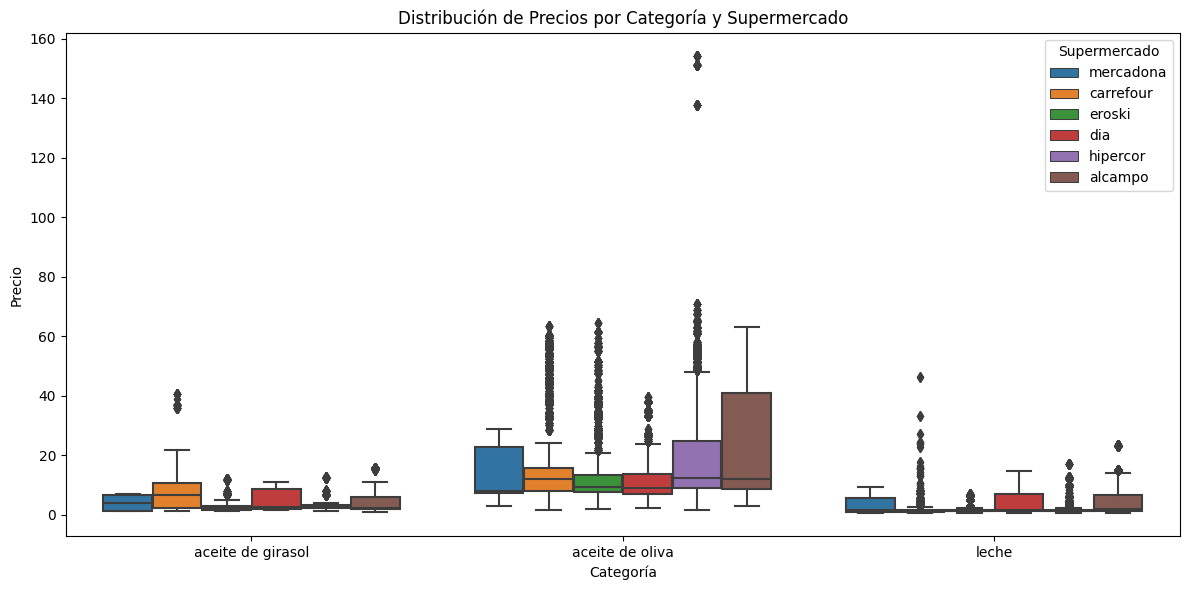

In [47]:
df_query1.groupby('categoria')['precio'].describe()



plt.figure(figsize=(12, 6))
sns.boxplot(x='categoria', y='precio', hue='super', data=df_query1)
plt.title('Distribución de Precios por Categoría y Supermercado')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.legend(title='Supermercado')
plt.tight_layout()
plt.show()

